In [7]:
# !pip install openai
# !pip install finrl library
# !pip install yfinance
# !pip install pandas
# !pip install numpy
# !pip install gymnasium
# !pip install matplotlib
# !pip install stable_baselines3
# !pip install alpaca-trade-api
# !pip install exchange_calendars
# !pip install stockstats
# !pip install wrds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.8/676.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.7/757.7 kB 12.2 MB/s eta 0:00:00
  Created wheel for msgpack: filename=msgpack-1.0.3-cp311-cp311-linux_x86_64.whl size=15687 sha256=3e5b68762e2609c78a46380f7487228085d64f8af7640a182a656d3c5db753d0
  Stored in directory: /root/.cache/pip/wheels/f6/35/da/ed9b26b510235e00e3a3c3bab7bad97b59214729662255ab3d
Successfully built msgpack
  Attempting uninstall: webso

In [1]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.config import INDICATORS

import itertools


In [2]:
# from datasets import load_dataset
# dataset = load_dataset("benstaf/nasdaq_2013_2023", data_files="train_data_deepseek_sentiment_2013_2018.csv")
# train = pd.DataFrame(dataset['train'])
# train = train.drop(columns=["Unnamed: 0"], errors="ignore")  # 해당 열이 없을 경우에도 오류 발생 안 함

In [3]:
# dataset = load_dataset("benstaf/nasdaq_2013_2023", data_files='trade_data_deepseek_sentiment_2019_2023.csv')

## 데이터 load

In [4]:
# from datasets import load_dataset
# dataset = load_dataset("benstaf/nasdaq_2013_2023", data_files="train_data_deepseek_sentiment_2013_2018.csv")
# train = pd.DataFrame(dataset['train'])
# train = train.drop(columns=["Unnamed: 0"], errors="ignore")  # 해당 열이 없을 경우에도 오류 발생 안 함


# data_preprocessing = train[["date", "tic", "close", "high", "low", "open", "volume"]]
# from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
# INDICATORS = [
#     "macd",
#     "boll_ub",
#     "boll_lb",
#     "rsi_14",
#     "rsi_30",
#     "cci_14",
#     "cci_30",
#     "dx_30",
#     "close_30_sma",
#     "close_60_sma",
#     "close_220_sma",
#     "close_264_sma",
# ]

In [5]:
# imp = pd.read_csv("../Task_1_FinRL_DeepSeek_Stock/data/nasdaq_exteral_data.csv", index_col=0, usecols=[3])
# chunks = pd.read_csv("/workspace/nasdaq_exteral_data.csv", chunksize=1000, header=0)
# from itertools import islice
# for num, chunk in enumerate(islice(chunks, 10)):  # 처음 10개 chunk만 반복
#     print(chunk.columns)

In [6]:
nasdaq_100_tickers_july_17_2023 = ['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'AMAT', 'AMD',
       'AMGN', 'AMZN', 'ANSS', 'ASML', 'AVGO', 'AZN', 'BIIB', 'BKNG',
       'BKR', 'CDNS', 'CHTR', 'CMCSA', 'COST', 'CPRT', 'CSCO', 'CSGP',
       'CSX', 'CTAS', 'CTSH', 'DLTR', 'DXCM', 'EA', 'EBAY', 'ENPH', 'EXC',
       'FANG', 'FAST', 'FTNT', 'GILD', 'GOOG', 'GOOGL', 'HON', 'IDXX',
       'ILMN', 'INTC', 'INTU', 'ISRG', 'KDP', 'KLAC', 'LRCX', 'LULU',
       'MAR', 'MCHP', 'MDLZ', 'MELI', 'META', 'MNST', 'MRVL', 'MSFT',
       'MU', 'NFLX', 'NVDA', 'NXPI', 'ODFL', 'ON', 'ORLY', 'PANW', 'PAYX',
       'PCAR', 'PEP', 'QCOM', 'REGN', 'ROST', 'SBUX', 'SIRI', 'SNPS',
       'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRTX', 'WBA', 'WBD', 'WDAY', 'XEL']


In [7]:
TRAIN_START_DATE = '2008-01-01'
TRAIN_END_DATE = '2018-12-31'
TRADE_START_DATE = '2019-01-01'
TRADE_END_DATE = '2023-12-31'

In [8]:
data_df = pd.DataFrame()
for tic in nasdaq_100_tickers_july_17_2023:
    df = yf.download(tic, start=TRAIN_START_DATE, end=TRADE_END_DATE)
    df.columns = df.columns.get_level_values(0)
    df['tic'] = tic
    df["ret"] = df.Close.pct_change().fillna(0)
    data_df = pd.concat([data_df, df], axis=0)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
data_df=data_df.reset_index()

In [10]:
data_df.sort_values(by='Date', inplace=True)

In [11]:
data_df['Date'] = data_df['Date'].dt.strftime('%Y-%m-%d')

In [12]:
data_df.rename(columns = {'Date':'date'}, inplace = True)

In [13]:
# 데이터 시작일 확인

for ticker in nasdaq_100_tickers_july_17_2023:
    ticker_data = data_df[data_df['tic'] == ticker]
    start_date = ticker_data.date.min()
    print(f"{ticker}의 데이터 시작일: {start_date}")

AAPL의 데이터 시작일: 2008-01-02
ADBE의 데이터 시작일: 2008-01-02
ADI의 데이터 시작일: 2008-01-02
ADP의 데이터 시작일: 2008-01-02
ADSK의 데이터 시작일: 2008-01-02
AEP의 데이터 시작일: 2008-01-02
ALGN의 데이터 시작일: 2008-01-02
AMAT의 데이터 시작일: 2008-01-02
AMD의 데이터 시작일: 2008-01-02
AMGN의 데이터 시작일: 2008-01-02
AMZN의 데이터 시작일: 2008-01-02
ANSS의 데이터 시작일: 2008-01-02
ASML의 데이터 시작일: 2008-01-02
AVGO의 데이터 시작일: 2009-08-06
AZN의 데이터 시작일: 2008-01-02
BIIB의 데이터 시작일: 2008-01-02
BKNG의 데이터 시작일: 2008-01-02
BKR의 데이터 시작일: 2008-01-02
CDNS의 데이터 시작일: 2008-01-02
CHTR의 데이터 시작일: 2010-01-05
CMCSA의 데이터 시작일: 2008-01-02
COST의 데이터 시작일: 2008-01-02
CPRT의 데이터 시작일: 2008-01-02
CSCO의 데이터 시작일: 2008-01-02
CSGP의 데이터 시작일: 2008-01-02
CSX의 데이터 시작일: 2008-01-02
CTAS의 데이터 시작일: 2008-01-02
CTSH의 데이터 시작일: 2008-01-02
DLTR의 데이터 시작일: 2008-01-02
DXCM의 데이터 시작일: 2008-01-02
EA의 데이터 시작일: 2008-01-02
EBAY의 데이터 시작일: 2008-01-02
ENPH의 데이터 시작일: 2012-03-30
EXC의 데이터 시작일: 2008-01-02
FANG의 데이터 시작일: 2012-10-12
FAST의 데이터 시작일: 2008-01-02
FTNT의 데이터 시작일: 2009-11-18
GILD의 데이터 시작일: 2008-01-02
GOOG의 데이터 시작일: 2008-0

In [14]:
data_df.rename(columns = {'Close':'close'}, inplace = True)
data_df.rename(columns = {'High':'high'}, inplace = True)
data_df.rename(columns = {'Low':'low'}, inplace = True)
data_df.rename(columns = {'Open':'open'}, inplace = True)
data_df.rename(columns = {'Volume':'volume'}, inplace = True)


In [15]:
data_df.drop(columns=['Adj Close'], inplace=True)

In [16]:
data_df.reset_index(drop=True, inplace=True)

## 데이터 없을때 사용

In [17]:
## 데이터가 없을 경우
lrcx = pd.read_csv("data/lrcx_historical_df.csv")

In [18]:
lrcx.rename(columns = {'날짜': 'date', '종가': 'close', '고가': 'high', '저가': 'low', '시가': 'open', '거래량': 'volume'}, inplace = True)

In [19]:
lrcx.drop(columns = ['변동 %'], inplace = True)

In [20]:
# 1️⃣ 문자열을 datetime 형식으로 변환
lrcx['date'] = pd.to_datetime(lrcx['date'], errors='coerce')

# 2️⃣ 원하는 형식으로 다시 문자열화
lrcx['date'] = lrcx['date'].dt.strftime('%Y-%m-%d')


In [21]:
lrcx.sort_values(by='date', inplace=True)

In [22]:
lrcx["tic"] = "LRCX"

In [23]:
lrcx["ret"] = lrcx.close.pct_change().fillna(0)

In [24]:
lrcx.reset_index(drop=True, inplace=True)

In [25]:
# volume 컬럼을 숫자로 변환하는 함수
def parse_volume(val):
    val = str(val).strip().upper()
    if val.endswith('M'):
        return float(val[:-1]) * 1_000_000
    elif val.endswith('B'):
        return float(val[:-1]) * 1_000_000_000
    elif val.endswith('K'):
        return float(val[:-1]) * 1_000
    else:
        try:
            return float(val.replace(',', ''))
        except:
            return None

# 적용
lrcx['volume'] = lrcx['volume'].apply(parse_volume)

In [26]:
lrcx

,date,close,open,high,low,volume,tic,ret
0,2007-01-03,4.95,5.09,5.15,4.86,44590000.0,LRCX,0.000000
1,2007-01-04,5.19,5.01,5.24,5.00,47970000.0,LRCX,0.048485
2,2007-01-05,5.18,5.16,5.18,5.05,32350000.0,LRCX,-0.001927
3,2007-01-08,5.13,5.19,5.29,5.11,33640000.0,LRCX,-0.009653
4,2007-01-09,5.12,5.18,5.18,5.04,35070000.0,LRCX,-0.001949
...,...,...,...,...,...,...,...,...
4583,2025-03-21,75.84,76.00,76.37,75.27,20060000.0,LRCX,-0.022050
4584,2025-03-24,77.99,77.74,78.78,77.38,7950000.0,LRCX,0.028349
4585,2025-03-25,77.67,77.85,78.37,77.47,6440000.0,LRCX,-0.004103
4586,2025-03-26,76.14,77.75,77.86,75.13,7330000.0,LRCX,-0.019699


In [27]:
data_df = pd.concat([data_df, lrcx], axis=0)

In [28]:
data_df.reset_index(drop=True, inplace=True)

In [29]:
data_df.sort_values(by='date', inplace=True)

## 현금 전환을 위한 Threshold 확인을 위한
### DUAL MOMENTUM 양수 갯수 확인
- 12개월의 누적 수익률 계산함. 이 누적 수익률이 무위험 수익률보다 높으면 해당 자산에 투자함
- Ticker 개수 대비 12개월 누적 수익률이 양수인 것의 갯수
### DAA 양수 갯수 확인
- 1,3,6, 12개월 가중치를 부여한 모멘텀 스코어 계산.
- 매월 모멘텀 점수가 양수인 갯수확인

### PAA 양수 갯수 확인 
- (현재 자산 가격 / 1년 이동평균선) -1
- 상승 추세인 자산 중에서 모멘텀이 높은 상위 n개 투자함.
- 총 양수 모멘텀 갯수 확인


### GTAA buy rule 갯수 확인
- 10개월 이동평균 < 현재 종가 갯수 확인

In [15]:

# def sma_by_month(data, months):
#     """각 날짜 기준으로 과거 N개월 동안의 평균을 수동으로 계산"""
#     data = data.copy()
#     data['date'] = pd.to_datetime(data['date'])
#     data = data.sort_values('date')
#     data.set_index('date', inplace=True)
    
#     result = pd.DataFrame(index=data.index)

#     for m in months:
#         sma_values = []
#         for current_date in data.index:
#             past_date = current_date - pd.DateOffset(months=m)
#             window_data = data.loc[(data.index > past_date) & (data.index <= current_date), 'close']
#             sma_values.append(window_data.mean() if not window_data.empty else None)
        
#         result[f'SMA_{m}m'] = sma_values

#     result.reset_index(inplace=True)
#     return result


# def sma_rolling(data):
#     sma_df = sma_by_month(data, months=[1, 2, 10, 12])
#     sma_df['date'] = sma_df['date'].dt.strftime('%Y-%m-%d')

#     return sma_df[['date', 'SMA_1m', 'SMA_2m', 'SMA_10m', 'SMA_12m']]

## Indicator 수정
- SMA, EMA, MACD, boll, RSI, CCI, sma_rolling는 원래 Close를 사용

In [30]:
def sma(data, period):
    ### 이동평균 계산 ###
    return data.rolling(window=period).mean()


def ema(data, period):
    """
    지수이동평균을 계산합니다.

    Args:
        data (df): 데이터 프레임
        period (int): 몇일 이동 평균을 계산할지

    Returns:
        지수이동평균: _description_
    """
    return data.ewm(span=period, adjust=False).mean()


def macd(data, short_period, long_period, signal_period):
    """
    MACD를 계산합니다.

    Args:
        data (df): 데이터 프레임
        short_period (int): 단기 이동평균 기간
        long_period (int): 장기 이동평균 기간
        signal_period (int): 신호선 기간

    Returns:
        MACD: _description_
    """
    
    short_ema = ema(data, short_period) # 12일
    long_ema = ema(data, long_period) # 26일
    macd = short_ema - long_ema # 12일 지수 이동평균 - 26일 지수 이동평균
    signal = ema(macd, signal_period) # MACD의 9일 지수 이동 평균
    # macd_histogram = macd - signal
    return signal


def bollinger_bands(data, period=20, std=2):
    sma_20 = sma(data, period) # 단순 이동 평균선
    std_dev = data.rolling(window=period).std()    
    upper_band = sma_20 + (std_dev * std)
    lower_band = sma_20 - (std_dev * std)
    return pd.DataFrame({'boll_ub': upper_band, 'boll_lb': lower_band})

def rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean() # 양수 값만 남기고 나머지는 0으로 대체
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean() # 음수만 남기고 나머지는 0으로 대체 음수를 양수로 변환
    epsilon = 1e-10 
    rs = gain / (loss + epsilon)

    rsi_li = 100 - (100 / (1 + rs))

    return rsi_li


def cci(high, low, close, period=14):
    tp = (high + low + close) / 3
    sma_tp = sma(tp, period) # tp의 14일 이동평균
    mad = abs(tp - sma_tp).rolling(window=period).mean()
    epsilon = 1e-10 
    return (tp - sma_tp) / (0.015 * mad + epsilon)


def sma_rolling(data):
    data_imp = data.copy()
    for period in [30, 60, 220, 252]:  # 30 days, 60 days, 10 months, 12 months
        data_imp[f'SMA_{period}'] = sma(data_imp['adjust_close'], period)
    return data_imp[['SMA_30', 'SMA_60', 'SMA_220', 'SMA_252']]


In [31]:
data_df.rename(columns = {'close':'adjust_close', "high" : "adjust_high", "low" : "adjust_low", "open" : "adjust_open"}, inplace = True)

In [32]:
concat_data = pd.DataFrame()

for ticker in data_df.tic.unique():
    imp = data_df[data_df.tic == ticker].copy()
    imp.reset_index(drop=True, inplace=True)
    
    # 날짜를 datetime으로 변환
    # imp['date'] = pd.to_datetime(imp['date'])
    macd_data = macd(imp['adjust_close'], 12, 26, 9)
    macd_data = pd.DataFrame({'macd': macd_data})
    # 날짜 기준 SMA 및 모멘텀 계산
    boll_band = bollinger_bands(imp["adjust_close"], period=20, std=2)
    rsi_df = rsi(imp["adjust_close"], period=14)
    rsi_df = pd.DataFrame({'rsi': rsi_df})
    sma_df = sma_rolling(imp)  # returns: ['date', 'SMA_1m', 'SMA_2m', ...]
    cci_df = cci(imp["adjust_high"], imp["adjust_low"], imp["adjust_close"], period=14)
    cci_df = pd.DataFrame({'cci': cci_df})
    sma_df = sma_rolling(imp)

    # 'date' 기준 merge (index 없이 정확히 날짜 맞추기 위해)
    # tot_imp = imp.merge(sma_df, on='date', how='left')
    # tot_imp = tot_imp.merge(close_and_return_df, on='date', how='left')
    # tot_imp = pd.concat([imp, macd_data, boll_band, rsi_df, cci_df, sma_df, close_and_return_df, dow_30], axis=1)

    combined = pd.concat([imp, sma_df, macd_data, boll_band, rsi_df, cci_df], axis=1)

    # 결측값 보간
    # return에서 앞에 값 넣 먼저 채우고 앞부분은 뒤에값으로 채워넣기
    # combined = combined.ffill().bfill()

    # concat
    concat_data = pd.concat([concat_data, combined], axis=0)
    concat_data.reset_index(drop=True, inplace=True)


In [33]:
slicing_df = concat_data[['date', 'volume', 'tic', 'SMA_30', 'SMA_60', 'SMA_220', 'SMA_252',
       'macd', 'boll_ub', 'boll_lb', 'rsi', 'cci']]

# Scale

In [37]:
def _adjust_ohl(data):
    ###
    # Adjust the OHL price with the ratio
    ###
    data["adjust_open"] = data["open_ratio"] * data["adjust_close"]
    data["adjust_high"] = data["high_ratio"] * data["adjust_close"]
    data["adjust_low"] = data["low_ratio"] * data["adjust_close"]
    return data
    

In [38]:
def scale_price(data, use_col):
    ###
    # Scale the price data using vectorized operations
    ###
    data = data.copy()  # 원본 데이터 보호
    data["adjust_close"] = data.groupby("tic")["ret"].transform(lambda x: (1 + x).cumprod())
    data = _adjust_ohl(data)
    return data[use_col]

In [39]:
def cal_ratio(total_data):
    ###
    # Calculate the ratio of OHL price to close price
    ###
    total_data["open_ratio"] = total_data["open"] / total_data["close"]
    total_data["high_ratio"] = total_data["high"] / total_data["close"]
    total_data["low_ratio"] = total_data["low"] / total_data["close"]
    return total_data
    

In [40]:
def close_and_return_momentum(data):
    data_imp = data.copy()
    # 한달 21일로 계산
    # periods = [21, 42, 63, 84, 105, 126, 147, 168, 189, 210, 231, 252]
    # periods = [22, 44, 66, 88, 110, 132, 154, 176, 198, 220, 242, 264]
    periods = [20, 40, 60, 80, 100, 120, 140, 160, 180, 220, 240, 252]

    columns_list = ["return_1m", "return_3m", "return_6m", "return_12m", "return_avg", "mom_12m", "mom_score"]
    columns_list.extend
    
    for idx, period in enumerate(periods):
        data_imp[f'close_{idx+1}_month'] = data_imp['adjust_close'].shift(period)
        columns_list.append(f'close_{idx+1}_month')
        
    data_imp['return_1m'] = (data_imp['adjust_close'] - data_imp['close_1_month']) / data_imp['close_1_month']
    data_imp['return_3m'] = (data_imp['adjust_close'] - data_imp['close_3_month']) / data_imp['close_3_month']
    data_imp['return_6m'] = (data_imp['adjust_close'] - data_imp['close_6_month']) / data_imp['close_6_month']
    data_imp['return_12m'] = (data_imp['adjust_close'] - data_imp['close_12_month']) / data_imp['close_12_month']
    data_imp['return_avg'] = data_imp[['return_1m', 'return_3m', 'return_6m', 'return_12m']].mean(axis=1)
    
    data_imp["mom_12m"] = data_imp["adjust_close"] / data_imp["close_12_month"] - 1
    
    data_imp["mom_score"] = (12 * data_imp["return_1m"] + 4 * data_imp["return_3m"] + 2 * data_imp["return_6m"] + 1 * data_imp["return_12m"]) / 19

    return data_imp[columns_list]

In [41]:
use_col = ["date", "tic", "ret","adjust_low", "adjust_high", "adjust_close", "adjust_open", "close", "high", "low", "open"]


In [42]:
data_df.rename(columns = {"adjust_close" : "close", "adjust_high" : "high", "adjust_low" : "low", "adjust_open" : "open"}, inplace = True)

In [45]:
TRAIN_START_DATE = '2013-01-01'
TRAIN_END_DATE = '2018-12-31'
TRADE_START_DATE = '2019-01-01'
TRADE_END_DATE = '2023-12-31'

In [46]:
# 데이터 전처리
data_df = cal_ratio(data_df)
data_df = scale_price(data_df, use_col)

In [47]:
scale_df = pd.DataFrame()

for ticker in data_df.tic.unique():
    imp = data_df[data_df.tic == ticker].copy()
    imp.reset_index(drop=True, inplace=True)
    
    # 날짜 기준 SMA 및 모멘텀 계산
    close_and_return_df = close_and_return_momentum(imp)

    # 'date' 기준 merge (index 없이 정확히 날짜 맞추기 위해)
    # tot_imp = imp.merge(sma_df, on='date', how='left')
    # tot_imp = tot_imp.merge(close_and_return_df, on='date', how='left')
    # tot_imp = pd.concat([imp, macd_data, boll_band, rsi_df, cci_df, sma_df, close_and_return_df, dow_30], axis=1)

    combined = pd.concat([imp, close_and_return_df], axis=1)

    # 결측값 보간
    # return에서 앞에 값 넣 먼저 채우고 앞부분은 뒤에값으로 채워넣기
    # combined = combined.ffill().bfill()

    # concat
    scale_df = pd.concat([scale_df, combined], axis=0)
    scale_df.reset_index(drop=True, inplace=True)


In [48]:
# scale_df.drop(columns = ["volume"], inplace=True)

In [62]:
tot_df = scale_df.merge(slicing_df, on = ["date", "tic"], how = "left")

#

In [24]:
# def close_and_return_momentum_by_date(data):
#     data_imp = data.copy()
#     data_imp['date'] = pd.to_datetime(data_imp['date'])
#     data_imp = data_imp.sort_values('date')
#     data_imp.set_index('date', inplace=True)

#     columns_list = ["date", "return_1m", "return_3m", "return_6m", "return_12m", "return_avg", "mom_12m", "mom_score", "dm_score"]

#     for m in range(1, 13):
#         # 1. 날짜 - m개월 만든 데이터프레임 생성
#         shifted = pd.DataFrame({'date': data_imp.index})
#         shifted['shifted_date'] = shifted['date'] - pd.DateOffset(months=m)

#         # 2. 해당 월의 종가를 가져옴
#         temp = data_imp[['close']].reset_index().rename(columns={'date': 'shifted_date', 'close': f'close_{m}m_ago'})

#         # 3. merge_asof로 가장 가까운 shifted_date 기준 종가 병합
#         merged = pd.merge_asof(shifted.sort_values('shifted_date'), temp.sort_values('shifted_date'), on='shifted_date')
#         merged.set_index('date', inplace=True)

#         # 4. 원래 데이터프레임에 붙이기
#         data_imp[f'close_{m}m_ago'] = merged[f'close_{m}m_ago']
#         columns_list.append(f'close_{m}m_ago')

#     # 수익률 계산
#     data_imp['return_1m'] = (data_imp['close'] - data_imp['close_1m_ago']) / data_imp['close_1m_ago']
#     data_imp['return_3m'] = (data_imp['close'] - data_imp['close_3m_ago']) / data_imp['close_3m_ago']
#     data_imp['return_6m'] = (data_imp['close'] - data_imp['close_6m_ago']) / data_imp['close_6m_ago']
#     data_imp['return_12m'] = (data_imp['close'] - data_imp['close_12m_ago']) / data_imp['close_12m_ago']

#     # 평균 수익률 및 모멘텀 스코어
#     data_imp['return_avg'] = data_imp[['return_1m', 'return_3m', 'return_6m', 'return_12m']].mean(axis=1)
#     data_imp['dm_score'] = data_imp['return_12m'] + 1
#     data_imp['mom_12m'] = data_imp['close'] / data_imp['close_12m_ago'] - 1
#     data_imp['mom_score'] = (
#         12 * data_imp['return_1m'] +
#          4 * data_imp['return_3m'] +
#          2 * data_imp['return_6m'] +
#          1 * data_imp['return_12m']
#     ) / 19

#     data_imp.reset_index(inplace=True)
#     data_imp['date'] = data_imp['date'].dt.strftime('%Y-%m-%d')

#     return data_imp[columns_list]



# def ema(data, period):
#     """
#     지수이동평균을 계산합니다.

#     Args:
#         data (df): 데이터 프레임
#         period (int): 몇일 이동 평균을 계산할지

#     Returns:
#         지수이동평균: _description_
#     """
#     return data.ewm(span=period, adjust=False).mean()



# def sma(data, period):
#     ### 이동평균 계산 ###
#     return data.rolling(window=period).mean()


# def macd(data, short_period, long_period, signal_period):
#     """
#     MACD를 계산합니다.

#     Args:
#         data (df): 데이터 프레임
#         short_period (int): 단기 이동평균 기간
#         long_period (int): 장기 이동평균 기간
#         signal_period (int): 신호선 기간

#     Returns:
#         MACD: _description_
#     """
    
#     short_ema = ema(data, short_period) # 12일
#     long_ema = ema(data, long_period) # 26일
#     macd = short_ema - long_ema # 12일 지수 이동평균 - 26일 지수 이동평균
#     signal = ema(macd, signal_period) # MACD의 9일 지수 이동 평균
#     # macd_histogram = macd - signal
#     return signal

# def bollinger_bands(data, period=20, std=2):
#     sma_20 = sma(data, period) # 단순 이동 평균선
#     std_dev = data.rolling(window=period).std()    
#     upper_band = sma_20 + (std_dev * std)
#     lower_band = sma_20 - (std_dev * std)
#     return pd.DataFrame({'boll_ub': upper_band, 'boll_lb': lower_band})

# def rsi(data, period=14):
#     delta = data.diff()
#     gain = (delta.where(delta > 0, 0)).rolling(window=period).mean() # 양수 값만 남기고 나머지는 0으로 대체
#     loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean() # 음수만 남기고 나머지는 0으로 대체 음수를 양수로 변환
#     epsilon = 1e-10 
#     rs = gain / (loss + epsilon)

#     rsi_li = 100 - (100 / (1 + rs))

#     return rsi_li


# def cci(high, low, close, period=14):
#     tp = (high + low + close) / 3
#     sma_tp = sma(tp, period) # tp의 14일 이동평균
#     mad = abs(tp - sma_tp).rolling(window=period).mean()
#     epsilon = 1e-10 
#     return (tp - sma_tp) / (0.015 * mad + epsilon)


#

In [87]:
processed_data = tot_df[tot_df["date"] >=TRAIN_START_DATE]


In [88]:
# na 있는 티커 찾기

for tic in processed_data.tic.unique():
    if processed_data[processed_data.tic == tic].isna().sum().sum() > 0:
        print(tic)
        


ENPH
META
PANW
WDAY
FANG


In [89]:
processed_data = processed_data.ffill()

In [90]:
processed_data.sort_values(['date','tic'], inplace=True)

In [91]:
processed_data.reset_index(drop=True, inplace=True)

In [78]:
# 결측치 있었던 것 ["FANG", "ENPH", "META", "PANW", "WDAY"]
# SMA 220 : 10개월 이동 평균
# mom_score : 모멘텀 스코어
# 필요한것 
# 누적 수익률 계산
# PAA 양수 갯수 확인

In [ ]:
# def min_max_normalize_volume_by_ticker(data):
#     data["volume_norm"] = data.groupby("tic")["volume"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
#     return data

In [ ]:
# processed_data = min_max_normalize_volume_by_ticker(processed_data)

In [ ]:
# processed_data.rename(columns = {"adjust_close":"close", "adjust_high":"high", "adjust_low":"low", "adjust_open":"open"}, inplace = True)

In [93]:
processed_data.columns

Index(['date', 'tic', 'ret', 'adjust_low', 'adjust_high', 'adjust_close',
       'adjust_open', 'close', 'high', 'low', 'open', 'return_1m', 'return_3m',
       'return_6m', 'return_12m', 'return_avg', 'mom_12m', 'mom_score',
       'close_1_month', 'close_2_month', 'close_3_month', 'close_4_month',
       'close_5_month', 'close_6_month', 'close_7_month', 'close_8_month',
       'close_9_month', 'close_10_month', 'close_11_month', 'close_12_month',
       'volume', 'SMA_30', 'SMA_60', 'SMA_220', 'SMA_252', 'macd', 'boll_ub',
       'boll_lb', 'rsi', 'cci'],
      dtype='object')

In [94]:
# PAA Score 확인

processed_data["paa_score"] = processed_data.apply(lambda row: (row["close"] / row["close_12_month"]) - 1, axis=1)

In [ ]:
# 기간별 momentum 양수 확인
# GTAA 전략 일자별 갯수 확인

In [95]:
processed_data["gtaa_buy_signal"] = (processed_data["close"] > processed_data["SMA_220"]).astype(int)
processed_data["paa_buy_signal"] = (processed_data["paa_score"] > 0).astype(int)
processed_data["daa_buy_signal"] = (processed_data["mom_score"] > 0).astype(int)


In [96]:
import numpy as np

def cumulative_momentum_product(row, months=12, risk_free_rate=0.02):
    """
    특정 행(row)에 대해 최근 N개월 동안의 개별 월별 모멘텀을 누적 곱한 후,
    risk-free rate(무위험 이자율)과 비교하여 투자 여부 결정.

    Parameters:
        row (pd.Series): 개별 행 데이터
        months (int): 계산할 개월 수 (기본값: 12)
        risk_free_rate (float): 무위험 이자율 (예: 1개월 미국 국채 금리)

    Returns:
        float: 누적 모멘텀 수익률 또는 risk-free rate
    """
    # 최근 N개월 동안의 월별 수익률을 기반으로 누적 수익률 계산
    monthly_returns = [(row[f"close_{t}_month"] / row[f"close_{t+1}_month"]) - 1
                       for t in range(1, months) if f"close_{t}_month" in row and f"close_{t+1}_month" in row]

    # NaN 제거 (데이터 누락 방지)
    
    # 누적 수익률 계산: ∏ (1 + R_t)
    cumulative_return = np.prod([1 + m for m in monthly_returns])

    # 투자 결정: 누적 수익률이 risk-free rate보다 크면 투자, 아니면 risk-free rate 적용
    return cumulative_return if cumulative_return > risk_free_rate else risk_free_rate

# DataFrame에 apply 적용


In [97]:
processed_data["momentum_product"] = processed_data.apply(lambda row: cumulative_momentum_product(row, months=12), axis=1)


In [98]:
processed_data["dm_buy_signal"] = (processed_data["momentum_product"] > 1).astype(int)

In [124]:
# dm_buy_signal, gtaa_buy_signal, paa_buy_signal, daa_buy_signal
# 일자별로 각각에 속하는 티커 확인

In [100]:
processed_data.date = pd.to_datetime(processed_data.date)

In [101]:
processed_data['date'] = processed_data['date'].dt.strftime('%Y-%m-%d')

In [102]:
processed_data.to_csv("data/processed_data_v5.csv", index=False)

In [83]:
import pandas as pd

In [84]:
import os
print(os.getcwd())


/workspace/base_line_model/Task_1_FinRL_DeepSeek_Stock


In [85]:
# processed_data = pd.read_csv("./data/processed_data_merged_trick.csv")

In [ ]:
train = pd.read_csv("./data/train_v2.csv", index_col=0)
trade = pd.read_csv("./data/test_v2.csv", index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: './data/train_v2.csv'

In [151]:
train["sentiment_buy"] = train["sentiment_deepseek"].apply(lambda x : 1 if x ==2 else 0)

In [152]:
def make_buy_signal(x):
    if (x ==1) | (x == 2):
        return 1
    else:
        return 0

In [153]:
train["risk_buy"] = train["risk_deepseek"].apply(make_buy_signal)

In [154]:
# 전략 목록
strategies = ['dm_buy_signal', 'gtaa_buy_signal', 'paa_buy_signal', 'daa_buy_signal', "sentiment_buy", "risk_buy"]

# 저장할 딕셔너리
buy_signals_by_date = {strategy: {} for strategy in strategies}

for strategy in strategies:
    filtered = train[train[strategy] == 1]  # 또는 == True

    for date, group in filtered.groupby('date'):
        buy_signals_by_date[strategy][date] = group['tic'].tolist()


In [167]:
# 전략 목록과 정렬 기준 정의
strategy_sorting_criteria = {
    'gtaa_buy_signal': 'volume',
    'sentiment_buy': 'volume',
    'risk_buy': 'volume',
    'dm_buy_signal': 'momentum_product',
    'paa_buy_signal': 'paa_score',
    'daa_buy_signal': 'mom_score',
}

# 저장할 딕셔너리
buy_signals_by_date_topk = {strategy: {} for strategy in strategy_sorting_criteria}
top_k = 10   # 원하는 Top K 값

for strategy, sort_column in strategy_sorting_criteria.items():
    filtered = train[train[strategy] == 1]

    for date, group in filtered.groupby('date'):
        # NaN 있는 경우 제외
        if sort_column not in group.columns:
            continue

        top_group = group.dropna(subset=[sort_column]) \
                          .sort_values(by=sort_column, ascending=False) \
                          .head(top_k)

        buy_signals_by_date_topk[strategy][date] = top_group['tic'].tolist()


In [168]:
momentum_data = pd.DataFrame(buy_signals_by_date_topk).sort_index()

In [169]:
momentum_data

,gtaa_buy_signal,sentiment_buy,risk_buy,dm_buy_signal,paa_buy_signal,daa_buy_signal
2013-01-02,"[GOOG, GOOGL, META, AMZN, LRCX, CSCO, CMCSA, E...","[MSFT, INTC, CMCSA, TXN, SBUX, PEP, ROST, AMGN...","[MSFT, AMGN, COST]","[FANG, ASML, WDAY, AMD, PANW, REGN, ENPH, MRVL...","[REGN, ASML, GILD, ILMN, NXPI, EBAY, SIRI, CMC...","[ASML, NFLX, REGN, PANW, SIRI, NXPI, META, ENP..."
2013-01-03,"[GOOG, GOOGL, META, AMZN, CSCO, MU, LRCX, NFLX...","[MSFT, INTC, CMCSA, SBUX, ROST, TXN, PEP, COST...","[MSFT, COST, AMGN]","[FANG, ASML, WDAY, PANW, AMD, ENPH, SIRI, MRVL...","[REGN, ASML, GILD, ILMN, NXPI, SIRI, EBAY, WBD...","[NFLX, ASML, PANW, SIRI, REGN, META, NXPI, ENP..."
2013-01-04,"[NVDA, GOOG, GOOGL, META, AMZN, CSCO, CMCSA, M...","[MSFT, INTC, CMCSA, SBUX, TXN, ROST, AMGN, CDN...","[MSFT, AMGN, COST]","[FANG, ASML, PANW, WDAY, AMD, META, SIRI, GILD...","[REGN, ASML, GILD, EBAY, ILMN, SIRI, NXPI, WBD...","[ASML, SIRI, PANW, NFLX, REGN, META, NXPI, ENP..."
2013-01-07,"[AMZN, META, GOOG, GOOGL, NFLX, MU, CSCO, EBAY...","[MSFT, INTC, EBAY, CMCSA, QCOM, SBUX, CDNS, RO...","[MSFT, ROST, AMGN, COST]","[FANG, PANW, AMD, META, WDAY, ASML, SIRI, GILD...","[REGN, ASML, GILD, EBAY, DXCM, NXPI, ILMN, WBD...","[NFLX, PANW, SIRI, ASML, REGN, NXPI, META, ENP..."
2013-01-08,"[GOOG, GOOGL, AMZN, META, CMCSA, CSCO, MU, EBA...","[INTC, MSFT, SBUX, CDNS, AMGN, ROST, AEP, COST...","[MSFT, AMGN, ROST, COST]","[FANG, PANW, AMD, META, WDAY, SIRI, GILD, WBD,...","[REGN, ASML, GILD, EBAY, ILMN, WBD, DXCM, SIRI...","[SIRI, PANW, ASML, NFLX, META, WBD, ENPH, REGN..."
...,...,...,...,...,...,...
2018-12-21,"[TSLA, AVGO, SBUX, EXC, PEP, XEL, AEP, KDP, DX...","[AMD, MSFT, TMUS, AEP, PCAR, CDNS, CHTR, ODFL,...","[MSFT, AEP, PCAR, CDNS, ORLY]","[NVDA, MU, EA, AMAT, BKR, NXPI, FANG, DXCM, AL...","[DXCM, ENPH, KDP, AMD, FTNT, LULU, WDAY, ORLY,...","[WDAY, KDP, EXC, AEP, AVGO, XEL]"
2018-12-24,"[AVGO, SBUX, EXC, KDP, XEL, AEP, DXCM, WDAY, O...","[AMD, MSFT, CSX, AEP, FANG, PAYX, PCAR, CDNS, ...","[MSFT, AMAT, PEP, AEP, PCAR, CDNS, DXCM, ORLY]","[NVDA, MU, EA, AMAT, BKR, FANG, ALGN, NXPI, DX...","[DXCM, ENPH, KDP, AMD, FTNT, LULU, WDAY, ORLY,...","[WDAY, KDP, EXC, AEP]"
2018-12-26,"[TSLA, AVGO, SBUX, EXC, XEL, PEP, AZN, DXCM, A...","[AMD, MSFT, MU, CSX, PANW, PCAR, COST, FANG, A...","[MSFT, AMAT, PCAR, DXCM, AEP, CDNS, VRSK, ORLY]","[NVDA, MU, EA, DXCM, AMAT, BKR, FANG, AMD, ALG...","[ENPH, DXCM, AMD, KDP, FTNT, LULU, WDAY, ORLY,...","[WDAY, KDP, AVGO, DLTR, ORLY, SBUX, EXC, AEP, ..."
2018-12-27,"[TSLA, AVGO, SBUX, EXC, FTNT, AZN, PEP, XEL, D...","[AMD, MSFT, CSX, PCAR, AMGN, AEP, FANG, CDNS, ...","[MSFT, TXN, PCAR, DXCM, AEP, CDNS, VRSK, ORLY]","[NVDA, DXCM, MU, EA, BKR, FANG, AMAT, WDAY, AL...","[DXCM, ENPH, AMD, KDP, FTNT, LULU, WDAY, ORLY,...","[WDAY, KDP, AVGO, DLTR, SBUX, ORLY, PANW, EXC,..."


In [170]:
# momentum_data.to_csv("momentum_signal_data_high_risk_top_10.csv")

In [171]:
from itertools import combinations
from collections import defaultdict

# 전략 목록
strategies = list(buy_signals_by_date_topk.keys())

# 모든 날짜 수집
all_dates = set()
for strategy_dict in buy_signals_by_date_topk.values():
    all_dates.update(strategy_dict.keys())

# 쌍별 날짜별 교집합 저장할 딕셔너리
overlapping_by_date_and_pair = defaultdict(dict)

# 날짜별로 순회
for date in sorted(all_dates):
    # 전략별 ticker set 구성
    strategy_ticker_map = {}
    for strategy in strategies:
        tickers = buy_signals_by_date_topk[strategy].get(date)
        if tickers:
            strategy_ticker_map[strategy] = set(tickers)

    # 전략 쌍별로 교집합 계산
    for strategy_a, strategy_b in combinations(strategy_ticker_map.keys(), 2):
        tickers_a = strategy_ticker_map[strategy_a]
        tickers_b = strategy_ticker_map[strategy_b]
        overlap = tickers_a & tickers_b

        if overlap:
            overlapping_by_date_and_pair[date][(strategy_a, strategy_b)] = sorted(overlap)

# 출력 예시
for date, pair_dict in overlapping_by_date_and_pair.items():
    print(f"\n📅 {date}")
    for (strategy_a, strategy_b), overlap in pair_dict.items():
        print(f"  - {strategy_a} & {strategy_b}: {overlap}")



📅 2013-01-02
  - gtaa_buy_signal & sentiment_buy: ['CMCSA']
  - gtaa_buy_signal & paa_buy_signal: ['CMCSA', 'EBAY']
  - gtaa_buy_signal & daa_buy_signal: ['META', 'NFLX']
  - sentiment_buy & risk_buy: ['AMGN', 'MSFT']
  - sentiment_buy & paa_buy_signal: ['CMCSA']
  - dm_buy_signal & paa_buy_signal: ['ASML', 'REGN', 'SIRI', 'WBD']
  - dm_buy_signal & daa_buy_signal: ['ASML', 'ENPH', 'PANW', 'REGN', 'SIRI']
  - paa_buy_signal & daa_buy_signal: ['ASML', 'NXPI', 'REGN', 'SIRI']

📅 2013-01-03
  - gtaa_buy_signal & sentiment_buy: ['CMCSA']
  - gtaa_buy_signal & dm_buy_signal: ['META']
  - gtaa_buy_signal & paa_buy_signal: ['CMCSA', 'EBAY']
  - gtaa_buy_signal & daa_buy_signal: ['META', 'MU', 'NFLX']
  - sentiment_buy & risk_buy: ['AMGN', 'COST', 'MSFT']
  - sentiment_buy & paa_buy_signal: ['CMCSA']
  - dm_buy_signal & paa_buy_signal: ['ASML', 'GILD', 'SIRI']
  - dm_buy_signal & daa_buy_signal: ['ASML', 'ENPH', 'META', 'PANW', 'SIRI']
  - paa_buy_signal & daa_buy_signal: ['ASML', 'NXPI', 'RE

In [172]:
from collections import defaultdict
import pandas as pd

# 전략쌍별 겹친 종목 수 저장용
overlap_count_by_pair = defaultdict(list)

for date, pair_dict in overlapping_by_date_and_pair.items():
    for pair, overlap_list in pair_dict.items():
        overlap_count_by_pair[pair].append(len(overlap_list))


In [173]:
print("📊 전략 쌍별 겹치는 종목 수 통계:\n")

for pair, counts in overlap_count_by_pair.items():
    print(f"▶️ {pair[0]} & {pair[1]}")
    series = pd.Series(counts)
    print(series.describe())
    print()


📊 전략 쌍별 겹치는 종목 수 통계:

▶️ gtaa_buy_signal & sentiment_buy
count    1302.000000
mean        1.615975
std         0.649003
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
dtype: float64

▶️ gtaa_buy_signal & paa_buy_signal
count    1470.000000
mean        2.885034
std         1.310681
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
dtype: float64

▶️ gtaa_buy_signal & daa_buy_signal
count    1436.000000
mean        2.731894
std         1.180498
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         7.000000
dtype: float64

▶️ sentiment_buy & risk_buy
count    1509.000000
mean        3.081511
std         1.272275
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
dtype: float64

▶️ sentiment_buy & paa_buy_signal
count    952.000000
mean       1.320378
std        0.559108
min        1.

In [87]:
# momentum_data.to_csv("momentum_signal_data_v2.csv")

In [88]:
momentum_data["sentiment_buy"].apply(lambda x : len(x)).describe()

count    1509.000000
mean       11.491054
std         2.918560
min         3.000000
25%        10.000000
50%        11.000000
75%        13.000000
max        24.000000
Name: sentiment_buy, dtype: float64

In [89]:
momentum_data["risk_buy"].iloc[0]

['AMGN', 'COST', 'MSFT']

In [90]:
momentum_data["risk_buy"].apply(lambda x: len(x) if isinstance(x, list) else 0).describe()

count    1509.000000
mean        5.467860
std         2.166126
min         1.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        15.000000
Name: risk_buy, dtype: float64

# EDA

In [ ]:
processed_data["gtaa_buy_signal"] = (processed_data["close"] > processed_data["SMA_220"]).astype(int)

In [153]:
gtaa_counts = processed_data.groupby("date")["dm_buy_siganl"].value_counts().unstack(fill_value=0)
import matplotlib.pyplot as plt
%matplotlib inline

# 날짜별 1의 개수 계산
gtaa_ones_count = processed_data.groupby("date")["dm_buy_siganl"].sum()

([<matplotlib.axis.XTick at 0x7f2c3be076d0>,
 [Text(0.0, 0, '2013-01-02'),
  Text(30.0, 0, '2013-02-14'),
  Text(60.0, 0, '2013-04-01'),
  Text(90.0, 0, '2013-05-13'),
  Text(120.0, 0, '2013-06-25'),
  Text(150.0, 0, '2013-08-07'),
  Text(180.0, 0, '2013-09-19'),
  Text(210.0, 0, '2013-10-31'),
  Text(240.0, 0, '2013-12-13'),
  Text(270.0, 0, '2014-01-29'),
  Text(300.0, 0, '2014-03-13'),
  Text(330.0, 0, '2014-04-25'),
  Text(360.0, 0, '2014-06-09'),
  Text(390.0, 0, '2014-07-22'),
  Text(420.0, 0, '2014-09-03'),
  Text(450.0, 0, '2014-10-15'),
  Text(480.0, 0, '2014-11-26'),
  Text(510.0, 0, '2015-01-12'),
  Text(540.0, 0, '2015-02-25'),
  Text(570.0, 0, '2015-04-09'),
  Text(600.0, 0, '2015-05-21'),
  Text(630.0, 0, '2015-07-06'),
  Text(660.0, 0, '2015-08-17'),
  Text(690.0, 0, '2015-09-29'),
  Text(720.0, 0, '2015-11-10'),
  Text(750.0, 0, '2015-12-23'),
  Text(780.0, 0, '2016-02-08'),
  Text(810.0, 0, '2016-03-22'),
  Text(840.0, 0, '2016-05-04'),
  Text(870.0, 0, '2016-06-16'),


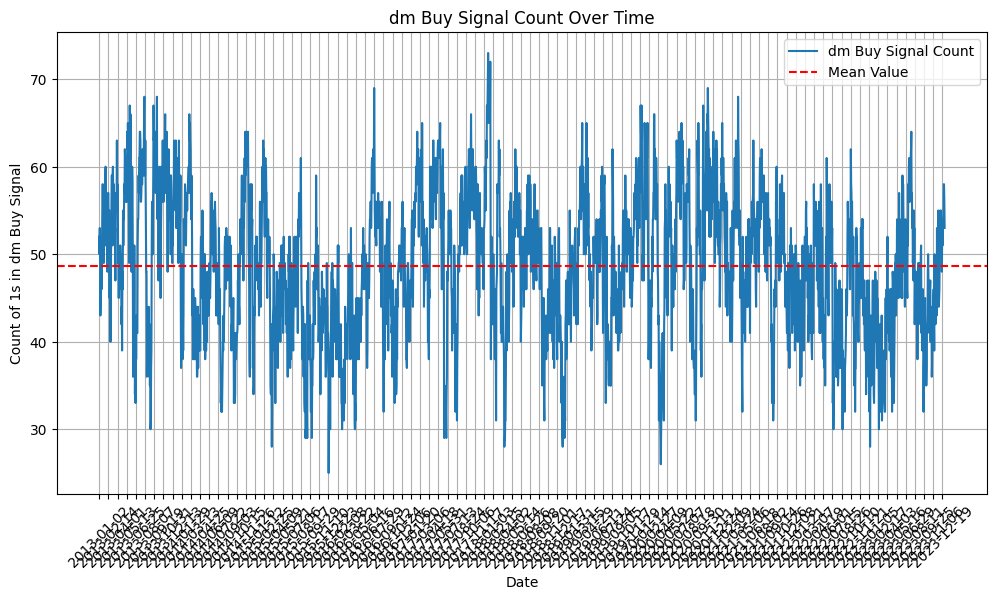

In [155]:
# 날짜별 1의 개수 계산


# 플롯 생성
plt.figure(figsize=(12, 6))
plt.plot(gtaa_ones_count.index, gtaa_ones_count.values, label="dm Buy Signal Count")
plt.axhline(y=gtaa_ones_count.mean(), color='r', linestyle='--', label="Mean Value")  # 평균선 추가
plt.xlabel("Date")
plt.ylabel("Count of 1s in dm Buy Signal")
plt.title("dm Buy Signal Count Over Time")
plt.legend()
plt.grid(True)
plt.xticks(gtaa_ones_count.index[::30], rotation=45)

In [157]:
gtaa_ones_count.describe()

count    2768.000000
mean       48.643425
std         8.041792
min        25.000000
25%        43.000000
50%        49.000000
75%        54.000000
max        73.000000
Name: dm_buy_siganl, dtype: float64

In [148]:
processed_data[processed_data["momentum_product"] > 0]

,date,close,high,low,open,volume,tic,SMA_30,SMA_60,SMA_220,...,close_9_month,close_10_month,close_11_month,close_12_month,paa_score,signal,gtaa_buy_signal,paa_buy_signal,daa_buy_signal,momentum_product
0,2013-01-02,16.669018,16.850273,16.444349,16.814447,560518000,AAPL,16.578904,17.364406,17.928593,...,18.089260,14.976683,12.633595,11.791876,-0.025389,0,0,0,0,1.000000
1,2013-01-02,38.340000,38.730000,37.919998,37.919998,6483800,ADBE,35.703000,34.370167,32.987045,...,34.509998,32.459999,28.969999,27.389999,0.181451,1,1,1,1,1.000000
2,2013-01-02,33.568127,33.575755,32.652632,32.652632,3761100,ADI,31.432764,30.620692,29.337021,...,30.033274,29.301159,27.082491,25.411098,0.154599,1,1,1,1,1.000000
3,2013-01-02,39.059662,39.166692,38.631537,38.838911,3217561,ADP,37.935974,38.074118,36.946912,...,36.203892,34.944511,35.698120,33.632240,0.064508,1,1,1,1,1.000000
4,2013-01-02,36.939999,36.950001,36.049999,36.049999,2998800,ADSK,33.955000,32.786500,34.709818,...,41.400002,38.650002,31.920000,33.439999,0.068557,1,1,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232507,2023-12-29,406.890015,409.619995,406.070007,409.000000,727400,VRTX,373.669669,370.454335,344.075318,...,295.769989,300.250000,296.250000,312.220001,0.207653,1,1,1,1,1.000000
232508,2023-12-29,24.135727,24.616406,23.802947,24.440774,10853300,WBA,21.279988,20.452235,25.117841,...,28.755606,31.691460,31.613846,34.864914,-0.082298,0,0,0,1,1.000000
232509,2023-12-29,11.380000,11.660000,11.330000,11.550000,20262200,WBD,11.246333,10.814500,12.482364,...,14.340000,14.730000,13.150000,11.090000,-0.086591,0,0,0,1,1.000000
232510,2023-12-29,276.059998,277.630005,274.049988,275.429993,975400,WDAY,262.524667,239.492000,218.356455,...,188.770004,189.539993,163.589996,169.600006,0.308608,1,1,1,1,1.000002


In [73]:
gtaa_ratio = processed_data.groupby("date")["gtaa_buy_signal"].mean()

In [ ]:
gtaa_counts = processed_data.groupby("date")["gtaa_buy_signal"].value_counts().unstack(fill_value=0)
import matplotlib.pyplot as plt
%matplotlib inline

# 날짜별 1의 개수 계산
gtaa_ones_count = processed_data.groupby("date")["gtaa_buy_signal"].sum()


# 플롯 생성
plt.figure(figsize=(12, 6))
plt.plot(gtaa_ones_count.index, gtaa_ones_count.values, label="GTAA Buy Signal Count")
plt.axhline(y=gtaa_ones_count.mean(), color='r', linestyle='--', label="Mean Value")  # 평균선 추가
plt.xlabel("Date")
plt.ylabel("Count of 1s in GTAA Buy Signal")
plt.title("GTAA Buy Signal Count Over Time")
plt.legend()
plt.grid(True)
plt.xticks(gtaa_ones_count.index[::30], rotation=45)


In [ ]:
## PAA 개수 양수 확인

In [103]:
day_mom_score = processed_data.groupby("date")["mom_score"].mean()

In [107]:
day_mom_score.describe()

count    2768.000000
mean        0.053886
std         0.055961
min        -0.268034
25%         0.028560
50%         0.063691
75%         0.088440
max         0.184844
Name: mom_score, dtype: float64

([<matplotlib.axis.XTick at 0x7f2c31fe3d10>,
 [Text(0.0, 0, '2013-01-02'),
  Text(60.0, 0, '2013-04-01'),
  Text(120.0, 0, '2013-06-25'),
  Text(180.0, 0, '2013-09-19'),
  Text(240.0, 0, '2013-12-13'),
  Text(300.0, 0, '2014-03-13'),
  Text(360.0, 0, '2014-06-09'),
  Text(420.0, 0, '2014-09-03'),
  Text(480.0, 0, '2014-11-26'),
  Text(540.0, 0, '2015-02-25'),
  Text(600.0, 0, '2015-05-21'),
  Text(660.0, 0, '2015-08-17'),
  Text(720.0, 0, '2015-11-10'),
  Text(780.0, 0, '2016-02-08'),
  Text(840.0, 0, '2016-05-04'),
  Text(900.0, 0, '2016-07-29'),
  Text(960.0, 0, '2016-10-24'),
  Text(1020.0, 0, '2017-01-20'),
  Text(1080.0, 0, '2017-04-18'),
  Text(1140.0, 0, '2017-07-13'),
  Text(1200.0, 0, '2017-10-06'),
  Text(1260.0, 0, '2018-01-03'),
  Text(1320.0, 0, '2018-04-02'),
  Text(1380.0, 0, '2018-06-26'),
  Text(1440.0, 0, '2018-09-20'),
  Text(1500.0, 0, '2018-12-17'),
  Text(1560.0, 0, '2019-03-15'),
  Text(1620.0, 0, '2019-06-11'),
  Text(1680.0, 0, '2019-09-05'),
  Text(1740.0, 0, 

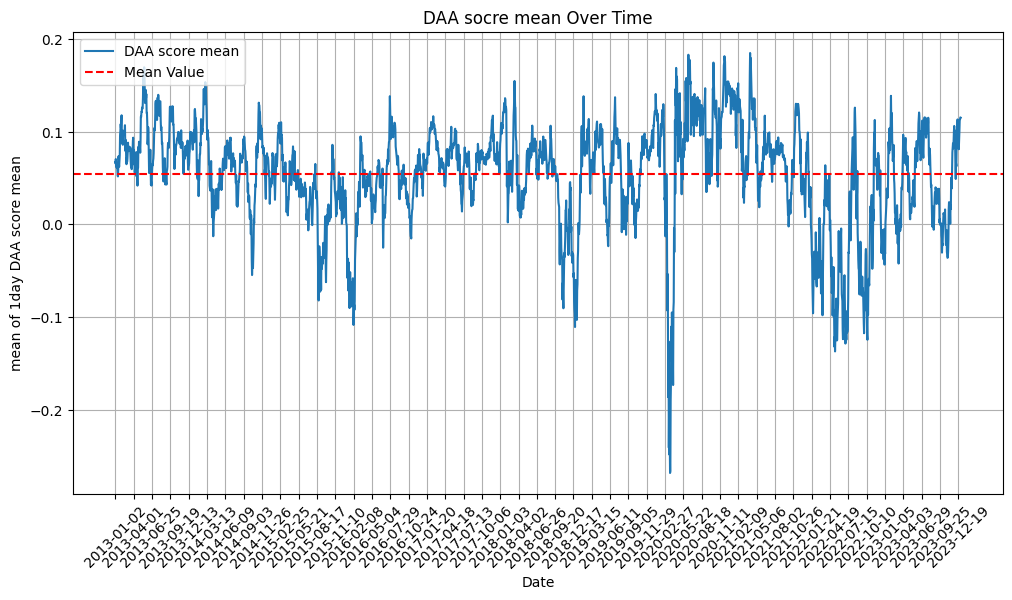

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(day_mom_score.index, day_mom_score.values, label="DAA score mean")
plt.axhline(y=day_mom_score.mean(), color='r', linestyle='--', label="Mean Value")  # 평균선 추가
plt.xlabel("Date")
plt.ylabel("mean of 1day DAA score mean")
plt.title("DAA socre mean Over Time")
plt.legend(loc = "upper left")
plt.grid(True)
plt.xticks(gtaa_ones_count.index[::60], rotation=45)

In [ ]:
# processed_data["daa_buy_signal"] = (processed_data["mom_score"] > 0).astype(int)

([<matplotlib.axis.XTick at 0x7f2c38884110>,
 [Text(0.0, 0, '2013-01-02'),
  Text(60.0, 0, '2013-04-01'),
  Text(120.0, 0, '2013-06-25'),
  Text(180.0, 0, '2013-09-19'),
  Text(240.0, 0, '2013-12-13'),
  Text(300.0, 0, '2014-03-13'),
  Text(360.0, 0, '2014-06-09'),
  Text(420.0, 0, '2014-09-03'),
  Text(480.0, 0, '2014-11-26'),
  Text(540.0, 0, '2015-02-25'),
  Text(600.0, 0, '2015-05-21'),
  Text(660.0, 0, '2015-08-17'),
  Text(720.0, 0, '2015-11-10'),
  Text(780.0, 0, '2016-02-08'),
  Text(840.0, 0, '2016-05-04'),
  Text(900.0, 0, '2016-07-29'),
  Text(960.0, 0, '2016-10-24'),
  Text(1020.0, 0, '2017-01-20'),
  Text(1080.0, 0, '2017-04-18'),
  Text(1140.0, 0, '2017-07-13'),
  Text(1200.0, 0, '2017-10-06'),
  Text(1260.0, 0, '2018-01-03'),
  Text(1320.0, 0, '2018-04-02'),
  Text(1380.0, 0, '2018-06-26'),
  Text(1440.0, 0, '2018-09-20'),
  Text(1500.0, 0, '2018-12-17'),
  Text(1560.0, 0, '2019-03-15'),
  Text(1620.0, 0, '2019-06-11'),
  Text(1680.0, 0, '2019-09-05'),
  Text(1740.0, 0, 

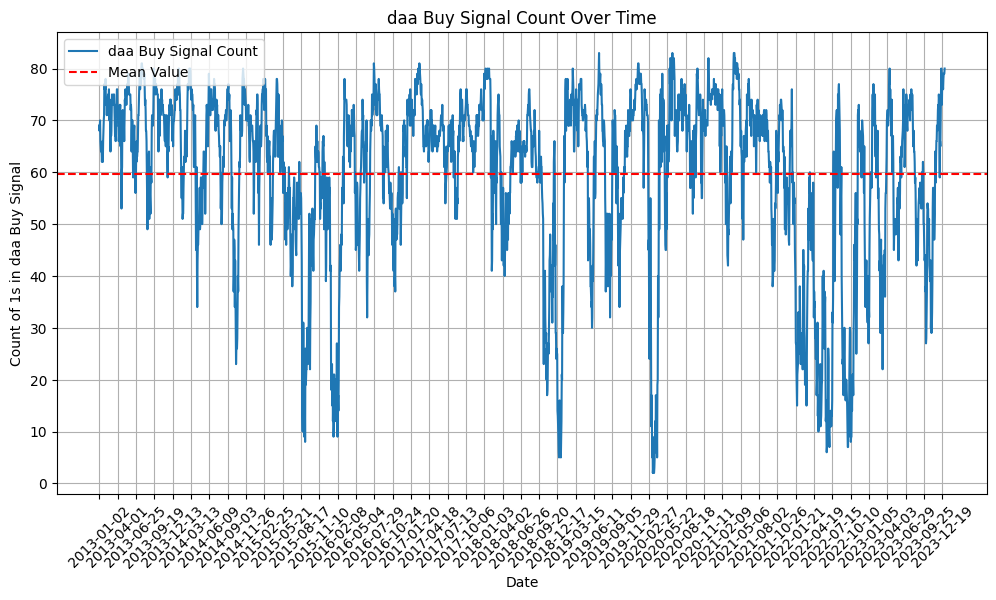

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

# 날짜별 1의 개수 계산
daa_buy_signal_counts = processed_data.groupby("date")["daa_buy_signal"].value_counts().unstack(fill_value=0)
gtaa_ones_count = processed_data.groupby("date")["daa_buy_signal"].sum()


# 플롯 생성
plt.figure(figsize=(12, 6))
plt.plot(gtaa_ones_count.index, gtaa_ones_count.values, label="daa Buy Signal Count")
plt.axhline(y=gtaa_ones_count.mean(), color='r', linestyle='--', label="Mean Value")  # 평균선 추가
plt.xlabel("Date")
plt.ylabel("Count of 1s in daa Buy Signal")
plt.title("daa Buy Signal Count Over Time")
plt.legend(loc = "upper left")
plt.grid(True)
plt.xticks(gtaa_ones_count.index[::60], rotation=45)


In [123]:
gtaa_ones_count.describe()

count    2768.000000
mean       59.718931
std        16.849182
min         2.000000
25%        52.000000
50%        65.000000
75%        72.000000
max        83.000000
Name: daa_buy_signal, dtype: float64

In [124]:
# PAA
day_mom_score = processed_data.groupby("date")["paa_score"].mean()

In [126]:
day_mom_score.describe()

count    2768.000000
mean        0.104192
std         0.085746
min        -0.185519
25%         0.062622
50%         0.123804
75%         0.157815
max         0.307312
Name: paa_score, dtype: float64

([<matplotlib.axis.XTick at 0x7f2c27a7bad0>,
 [Text(0.0, 0, '2013-01-02'),
  Text(60.0, 0, '2013-04-01'),
  Text(120.0, 0, '2013-06-25'),
  Text(180.0, 0, '2013-09-19'),
  Text(240.0, 0, '2013-12-13'),
  Text(300.0, 0, '2014-03-13'),
  Text(360.0, 0, '2014-06-09'),
  Text(420.0, 0, '2014-09-03'),
  Text(480.0, 0, '2014-11-26'),
  Text(540.0, 0, '2015-02-25'),
  Text(600.0, 0, '2015-05-21'),
  Text(660.0, 0, '2015-08-17'),
  Text(720.0, 0, '2015-11-10'),
  Text(780.0, 0, '2016-02-08'),
  Text(840.0, 0, '2016-05-04'),
  Text(900.0, 0, '2016-07-29'),
  Text(960.0, 0, '2016-10-24'),
  Text(1020.0, 0, '2017-01-20'),
  Text(1080.0, 0, '2017-04-18'),
  Text(1140.0, 0, '2017-07-13'),
  Text(1200.0, 0, '2017-10-06'),
  Text(1260.0, 0, '2018-01-03'),
  Text(1320.0, 0, '2018-04-02'),
  Text(1380.0, 0, '2018-06-26'),
  Text(1440.0, 0, '2018-09-20'),
  Text(1500.0, 0, '2018-12-17'),
  Text(1560.0, 0, '2019-03-15'),
  Text(1620.0, 0, '2019-06-11'),
  Text(1680.0, 0, '2019-09-05'),
  Text(1740.0, 0, 

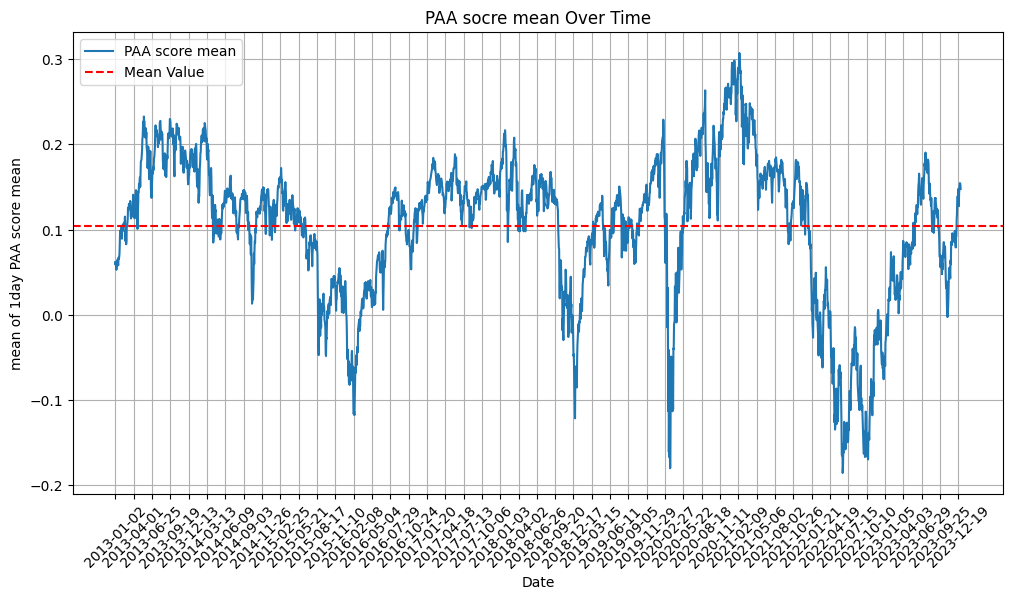

In [129]:
plt.figure(figsize=(12, 6))
plt.plot(day_mom_score.index, day_mom_score.values, label="PAA score mean")
plt.axhline(y=day_mom_score.mean(), color='r', linestyle='--', label="Mean Value")  # 평균선 추가
plt.xlabel("Date")
plt.ylabel("mean of 1day PAA score mean")
plt.title("PAA socre mean Over Time")
plt.legend(loc = "upper left")
plt.grid(True)
plt.xticks(gtaa_ones_count.index[::60], rotation=45)

([<matplotlib.axis.XTick at 0x7f2c39b9f750>,
 [Text(0.0, 0, '2013-01-02'),
  Text(60.0, 0, '2013-04-01'),
  Text(120.0, 0, '2013-06-25'),
  Text(180.0, 0, '2013-09-19'),
  Text(240.0, 0, '2013-12-13'),
  Text(300.0, 0, '2014-03-13'),
  Text(360.0, 0, '2014-06-09'),
  Text(420.0, 0, '2014-09-03'),
  Text(480.0, 0, '2014-11-26'),
  Text(540.0, 0, '2015-02-25'),
  Text(600.0, 0, '2015-05-21'),
  Text(660.0, 0, '2015-08-17'),
  Text(720.0, 0, '2015-11-10'),
  Text(780.0, 0, '2016-02-08'),
  Text(840.0, 0, '2016-05-04'),
  Text(900.0, 0, '2016-07-29'),
  Text(960.0, 0, '2016-10-24'),
  Text(1020.0, 0, '2017-01-20'),
  Text(1080.0, 0, '2017-04-18'),
  Text(1140.0, 0, '2017-07-13'),
  Text(1200.0, 0, '2017-10-06'),
  Text(1260.0, 0, '2018-01-03'),
  Text(1320.0, 0, '2018-04-02'),
  Text(1380.0, 0, '2018-06-26'),
  Text(1440.0, 0, '2018-09-20'),
  Text(1500.0, 0, '2018-12-17'),
  Text(1560.0, 0, '2019-03-15'),
  Text(1620.0, 0, '2019-06-11'),
  Text(1680.0, 0, '2019-09-05'),
  Text(1740.0, 0, 

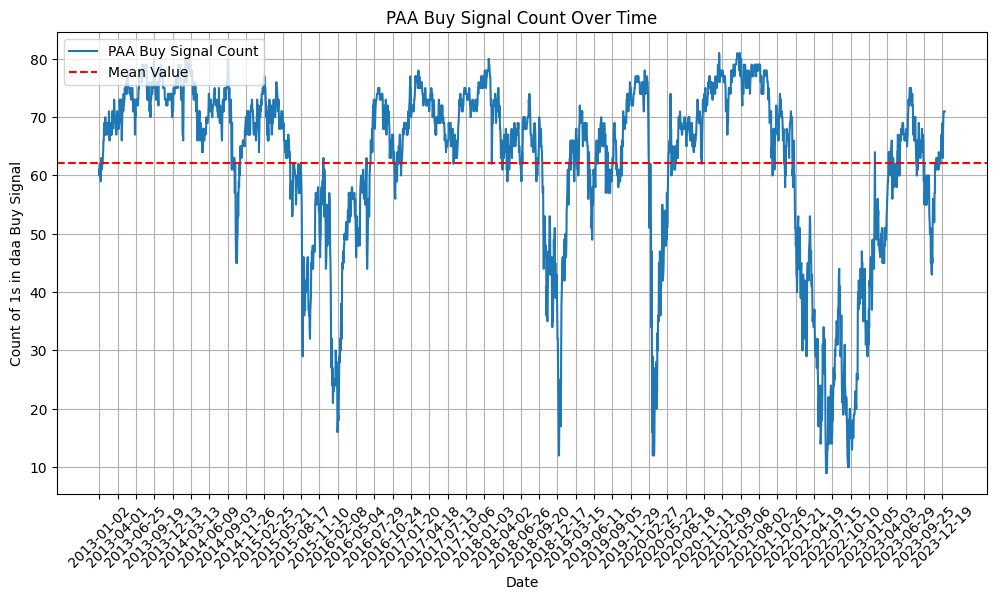

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

# 날짜별 1의 개수 계산
daa_buy_signal_counts = processed_data.groupby("date")["paa_buy_signal"].value_counts().unstack(fill_value=0)
gtaa_ones_count = processed_data.groupby("date")["paa_buy_signal"].sum()


# 플롯 생성
plt.figure(figsize=(12, 6))
plt.plot(gtaa_ones_count.index, gtaa_ones_count.values, label="PAA Buy Signal Count")
plt.axhline(y=gtaa_ones_count.mean(), color='r', linestyle='--', label="Mean Value")  # 평균선 추가
plt.xlabel("Date")
plt.ylabel("Count of 1s in daa Buy Signal")
plt.title("PAA Buy Signal Count Over Time")
plt.legend(loc = "upper left")
plt.grid(True)
plt.xticks(gtaa_ones_count.index[::60], rotation=45)


In [134]:
gtaa_ones_count.describe()

count    2768.000000
mean       62.138367
std        15.203808
min         9.000000
25%        57.000000
50%        67.000000
75%        73.000000
max        81.000000
Name: paa_buy_signal, dtype: float64

In [42]:
data_df.columns = ['date','close','high','low','open','volume','tic', "adj_close"]

In [43]:
data_df = data_df.drop('adj_close', axis=1)


In [35]:
data_df['date']=data_df.date.apply(lambda x: x.strftime('%Y-%m-%d'))
# drop missing data 
data_df = data_df.dropna()
data_df = data_df.reset_index(drop=True)
print("Shape of DataFrame: ", data_df.shape)

Shape of DataFrame:  (346265, 7)


In [45]:
data_df.sort_values(by='date', inplace=True)

In [ ]:
        data_df = pd.DataFrame()
        for tic in self.ticker_list:
            temp_df = yf.download(tic, start=self.start_date, end=self.end_date)
            temp_df['tic'] = tic
            data_df=data_df.append(temp_df)
        # reset the index, we want to use numbers as index instead of dates
        data_df=data_df.reset_index()
        try:
            # convert the column names to standardized names
            data_df.columns = ['date','open','high','low','close','adjcp','volume','tic']
            # use adjusted close price instead of close price
            data_df['close'] = data_df['adjcp']
            # drop the adjusted close price column
            data_df = data_df.drop('adjcp', 1)
        except NotImplementedError:
            print("the features are not supported currently")

        # convert date to standard string format, easy to filter
        data_df['date']=data_df.date.apply(lambda x: x.strftime('%Y-%m-%d'))
        # drop missing data 
        data_df = data_df.dropna()
        data_df = data_df.reset_index(drop=True)
        print("Shape of DataFrame: ", data_df.shape)
        #print("Display DataFrame: ", data_df.head())

        return data_df

In [9]:
df_raw = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = nasdaq_100_tickers_july_17_2023[0]).fetch_data()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ValueError: Length mismatch: Expected axis has 22 elements, new values have 8 elements

In [8]:
df_raw

In [7]:
data_df = pd.DataFrame()


In [ ]:
for tick in nasdaq_100_tickers_july_17_2023[0:5]:
    df_raw = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = tick)
    temp_df["tic"] = tic

    data_df = data_df.append(df_raw)

AttributeError: 'DataFrame' object has no attribute 'append'

In [22]:
temp_df = yf.download(nasdaq_100_tickers_july_17_2023[0:5], start=TRAIN_START_DATE, end=TRADE_END_DATE)

[*********************100%***********************]  5 of 5 completed


In [ ]:
temp_df["tic"] = tic
data_df = data_df.append(temp_df)

Price,Close,High,Low,Open,Volume
Ticker,ADBE,ADBE,ADBE,ADBE,ADBE
Date,,,,,
2008-01-02,41.709999,43.250000,41.450001,42.900002,6047700
2008-01-03,41.790001,42.209999,41.500000,41.549999,5186700
2008-01-04,40.360001,41.490002,40.009998,41.299999,8938700
2008-01-07,40.240002,40.750000,39.680000,40.389999,7757600
2008-01-08,39.220001,40.189999,39.189999,39.900002,8896200
...,...,...,...,...,...
2023-12-22,598.750000,601.859985,596.000000,600.799988,1659800
2023-12-26,598.260010,601.690002,596.500000,598.919983,1595100


In [ ]:
# df_raw = YahooDownloader(start_date = TRAIN_START_DATE,
#                      end_date = TRADE_END_DATE,
#                      ticker_list = nasdaq_100_tickers_july_17_2023[0]).fetch_data()


# nasdaq_100_tickers_july_17_2023.insert(position, "SGEN")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ValueError: Length mismatch: Expected axis has 22 elements, new values have 8 elements